# Aplicação do Naive Bayes aos dados iris

## SME0829 Aprendizado de Máquina

## Profa. Cibele Russo - ICMC USP

Dados de flores iris.

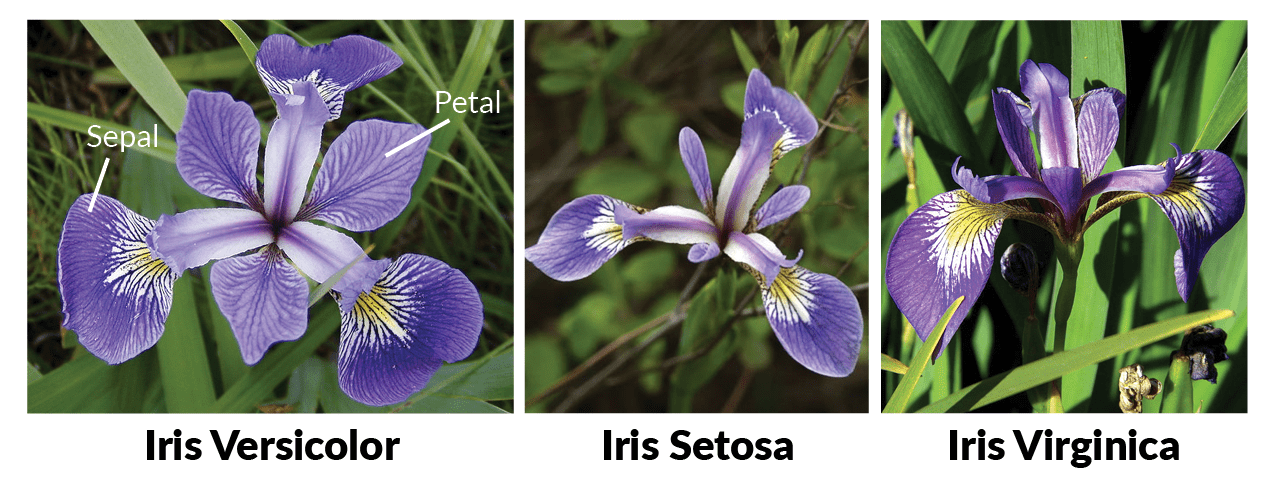

Fonte: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

Detalhes dos dados.

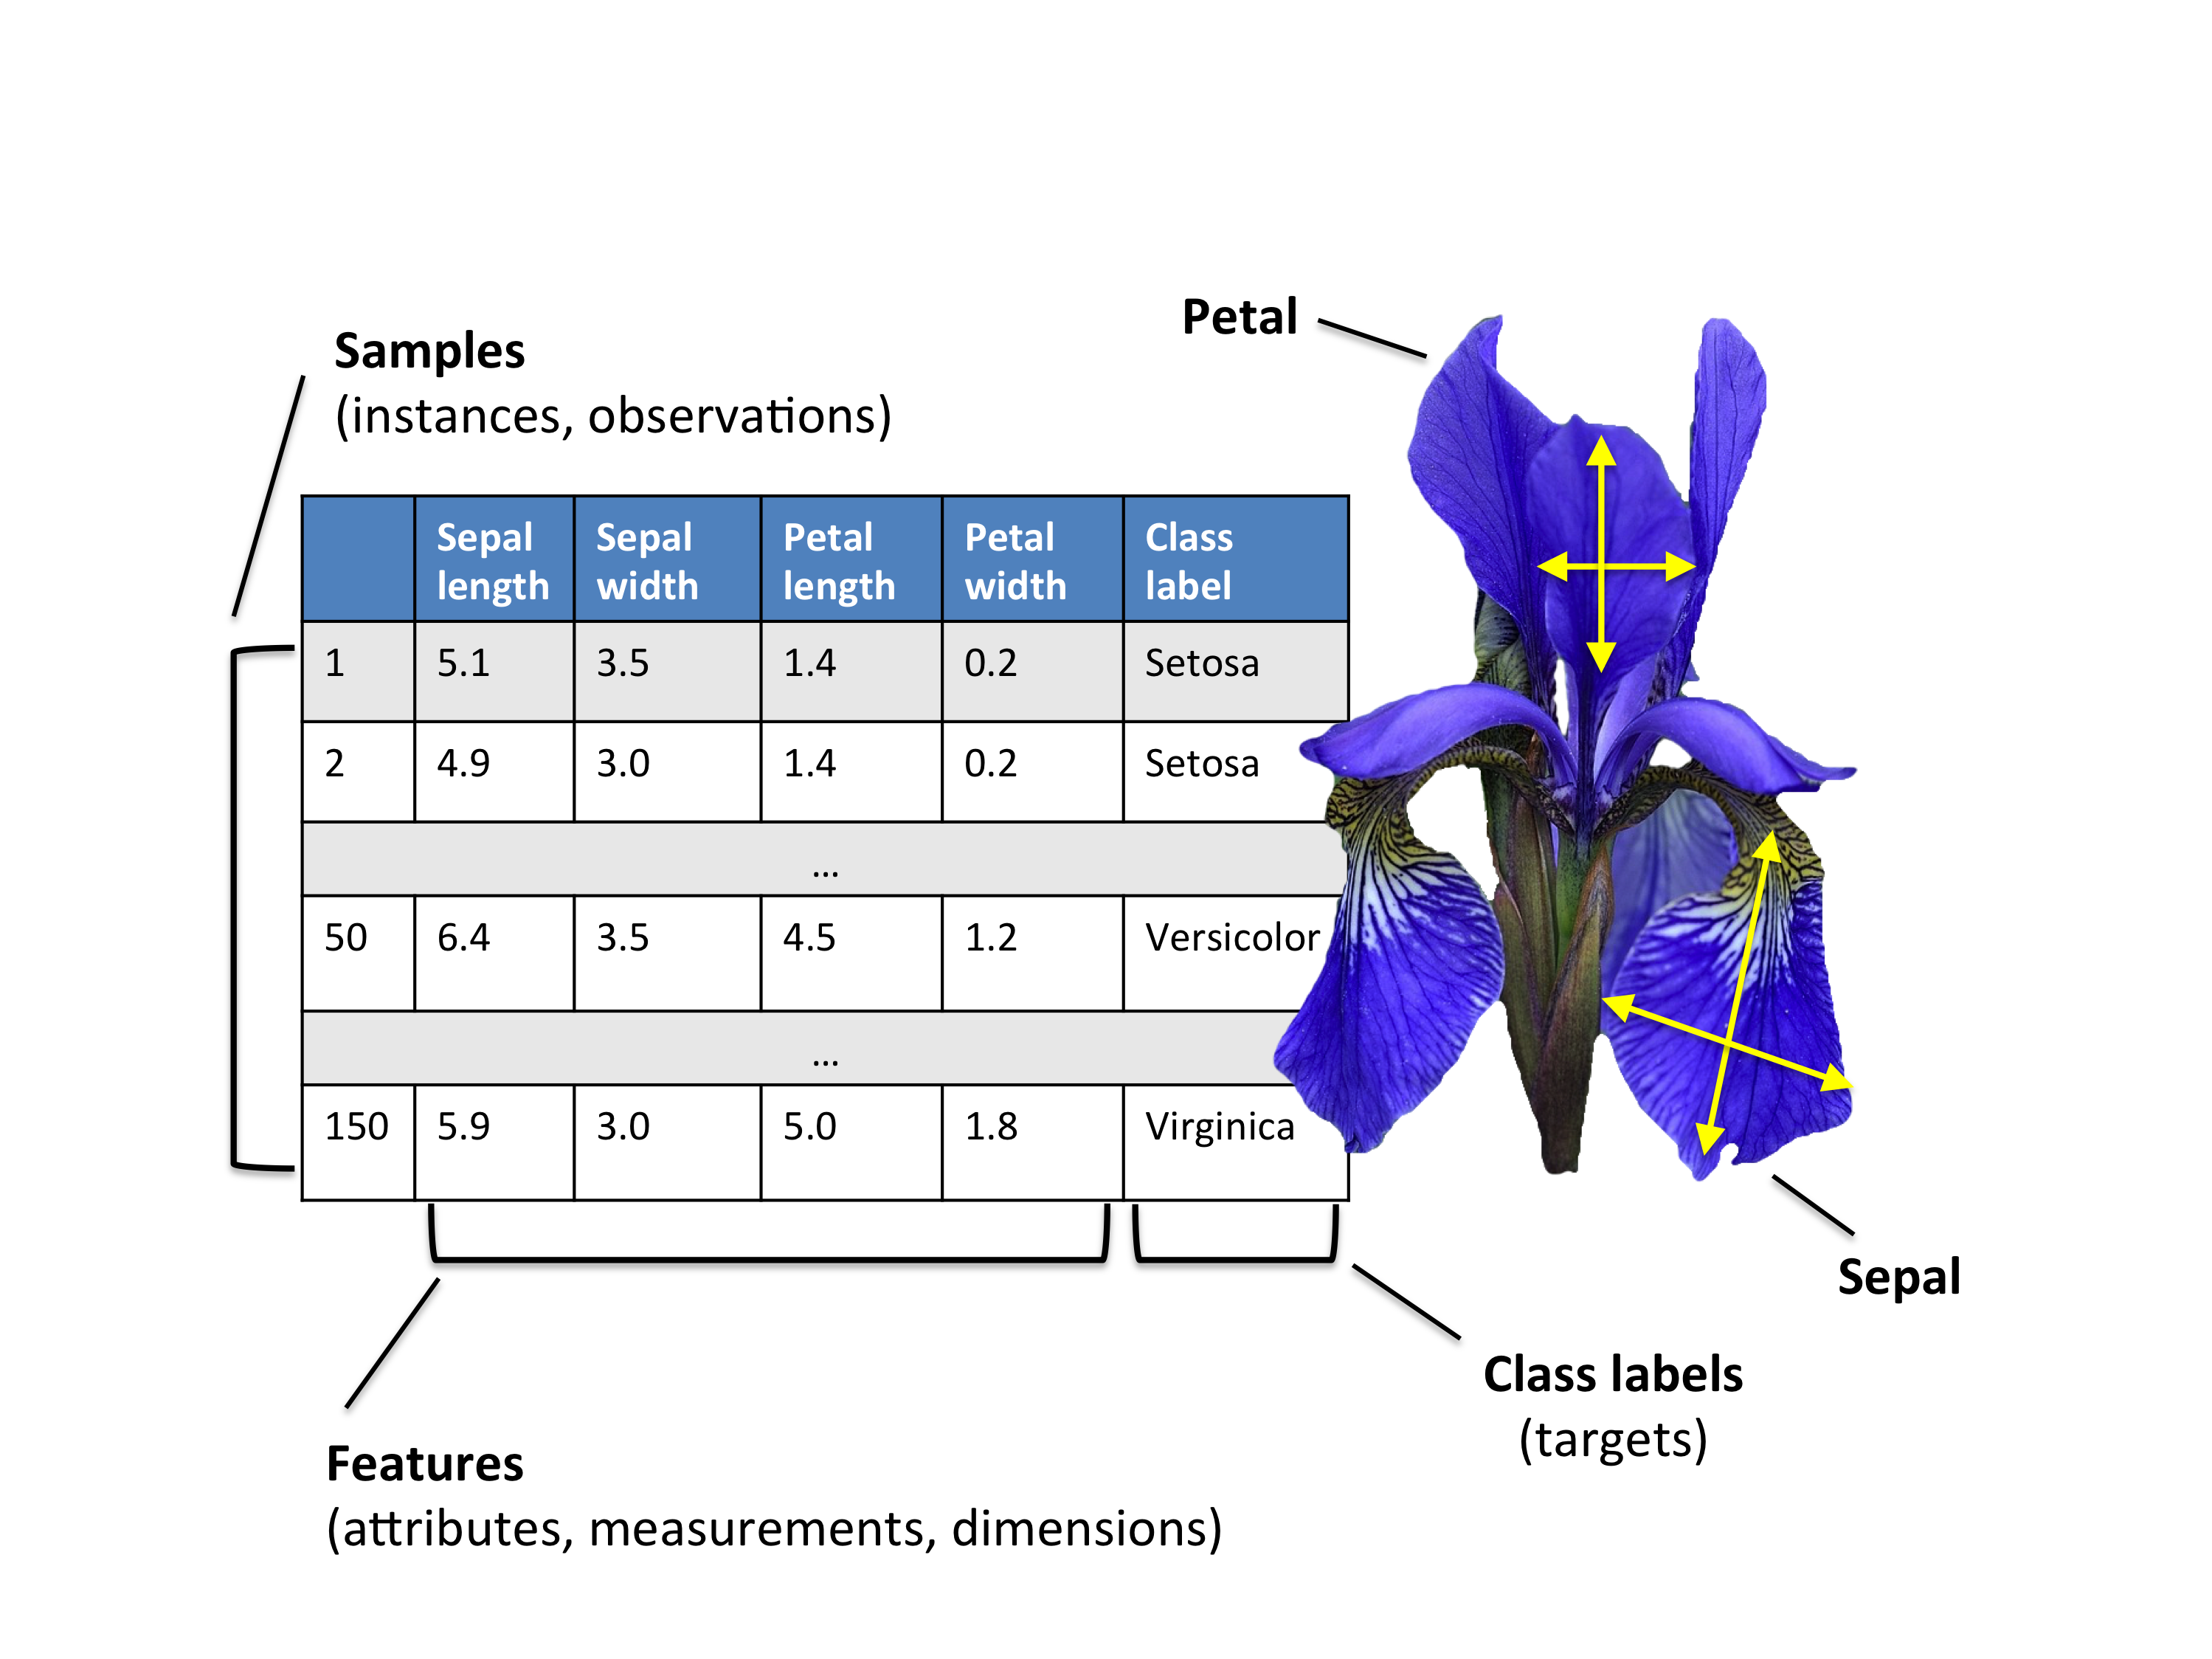

Fonte: https://www.mghassany.com/courses/MLcourse/pw-6.html

In [1]:
# Alguns códigos foram inspirados em códigos de Faceli e outros (2022)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes e análise de dados
import sklearn as skl # importa o sckit-learn
import time # sera usada para calcular o tempo de execucao dos metodos de classificacao


# importa alguns pacotes do sckit-learn
from sklearn import model_selection 
from sklearn import linear_model # necessario para usar regressão logística
from sklearn import naive_bayes # necessario para usar o metodo naive Bayes
from sklearn import tree # necessario para usar arvores de decisao
from sklearn import svm # necessario para usar o metodo SVM
from sklearn import neighbors # necessario para usar o metodo KNN
from sklearn import model_selection # necessario para fazer validacao cruzada
from sklearn import metrics # necessario para obter o desempenho da classificacao

# bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

print('Bibliotecas carregadas com sucesso')


Bibliotecas carregadas com sucesso


#### Leitura dos dados iris 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado_de_Maquina/main/Dados/iris.csv')
df.tail(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.value_counts("Species")

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

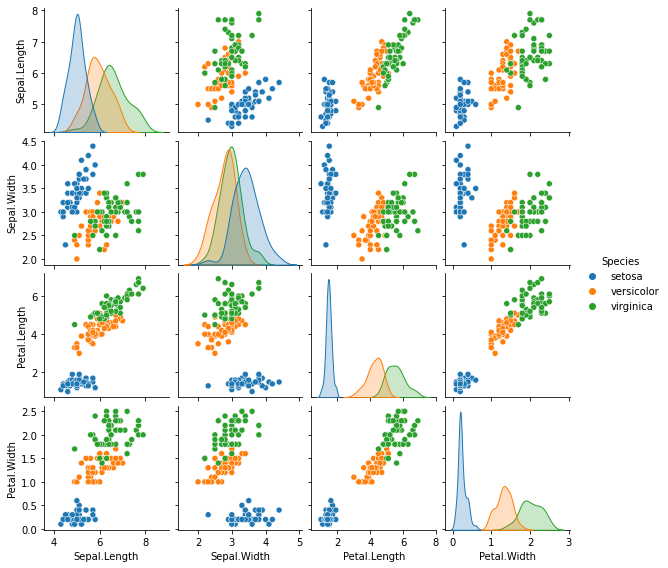

In [5]:
sns.pairplot(df,hue='Species', height=2)

In [6]:
# Considere as duas primeiras preditoras, Sepal.Length e Sepal.Width
# Inspirado em códigos de Faceli et al (2022)

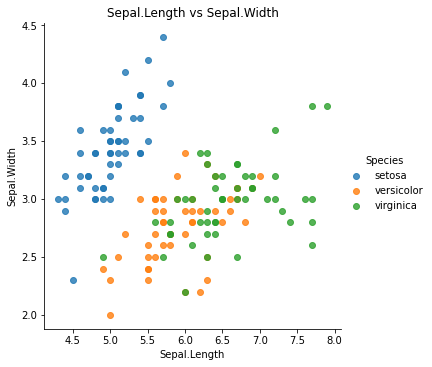

In [7]:
# scatter plot
sns.lmplot(x='Sepal.Length', y='Sepal.Width', data=df, 
           fit_reg=False,   # Sem linha de regressão
           hue='Species')   # Cores diferentes por classe

# cria um título para o gráfico
plt.title('Sepal.Length vs Sepal.Width')

# mostra o gráfico
plt.show()

In [8]:
X = df.iloc[:,0:2].values
Y = df.iloc[:, 4].values
X, Y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [9]:
# Divisão da base em treinamento (80%) e teste (20%)
cv = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# retorna os índices de treino e teste
train_index, test_index = list( cv.split(X, Y) )[0]

# retorna as partições de treino e teste de acordo com os índices
X_train, X_test = X[train_index, :], X[test_index, :];
Y_train, Y_test = Y[train_index], Y[test_index];

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

# imprime a porcentagem de dados de treinamento de cada classe
print("\nQtd. de dados de cada classe (treinamento)")
cTrain, counts_cTrain = np.unique(np.sort(Y_train), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTrain[i],counts_cTrain[i],(counts_cTrain[i]/len(Y_train))*100 ) )

# imprime a porcetagem de dados de teste de cada classe
print("\nQtd. de dados de cada classe (teste)")
cTest, counts_cTest = np.unique(np.sort(Y_test), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTest[i],counts_cTest[i],(counts_cTest[i]/len(Y_test))*100 ) )



Qtd. dados de treinamento: 120 (80.00%)
Qtd. de dados de teste: 30 (20.00%)

Qtd. de dados de cada classe (treinamento)
	Classe setosa: 40 (33.33%)
	Classe versicolor: 40 (33.33%)
	Classe virginica: 40 (33.33%)

Qtd. de dados de cada classe (teste)
	Classe setosa: 10 (33.33%)
	Classe versicolor: 10 (33.33%)
	Classe virginica: 10 (33.33%)


In [10]:
# normaliza os valores dos atributos para que fiquem com media igual a zero e desvio padrao igual a um
scaler = skl.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Cria um classificador Bayes ingênuo (Naive Bayes)
gnb = GaussianNB()

# Treina o classificador na base de treinamento
gnb.fit(X_train, Y_train)

# Predição dos rótulos na base de teste
Y_pred = gnb.predict(X_test)

# Cálculo da acurácia
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7


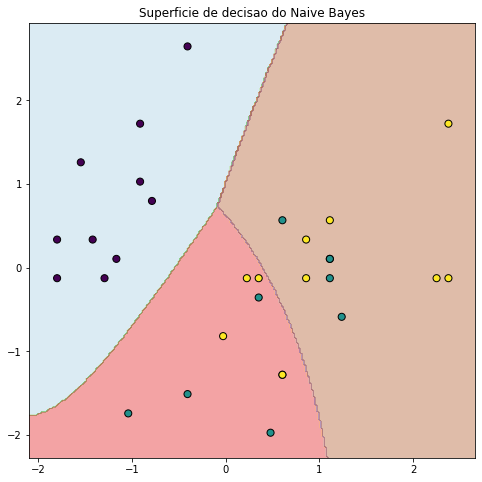

In [12]:
# Superfície de decisão. Adaptado de Faceli e outros (2022)

def plota_superficieDecisao(classifier, X, Y, ax, title = ""):
    h = .02  # tamanho do passo da malha (mesh)

    # cria uma malha (mesh)
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
     
    # obtem a predicao
    Z = classifier(np.c_[xx.ravel(), yy.ravel()])

    # converte os valores do vetor para indices
    Z2 = np.unique(Z, return_inverse=True)[1]

    # plota a superficie de decisao
    Z2 = Z2.reshape(xx.shape)
    ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

    # converte os valores do vetor para indices
    Y2 = np.unique(Y, return_inverse=True)[1]

    # plota os dados de treinamento
    ax.scatter(X[:, 0], X[:, 1], c=Y2, edgecolor='k', s=50)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize='large')
    

# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8)) 

# chama a funcao para plotar a superficie de decisao juntamente com os dados de teste
plota_superficieDecisao(gnb.predict, X_test, Y_test, ax, title = "Superficie de decisao do Naive Bayes")